# Code release week (04/04/2023) 


## ABAQUS RVE simulator 



## Presenter: Jiaxiang Yi([J.Yi@tudelft.nl](mailto:J.Yi@tudelft.nl))

# Outline   

## 1. Why I(We) need ABAQUS RVE simulator?

## 2. Basics of RVE simulation 

## 3. Structure of the Repo 

## 4. How to run an RVE simulation via the code 



## 1. Why I(We) need ABAQUS RVE simulator?


## Research Plan 
<center>
     <img src=figures/F3DASM.png width=50%> 
</center>
    
---
    
- **Bottleneck** : generate large amount of simulation data *automatically*

## 2. Basics of RVE simulation

## Multiscale simulation ($FE^2 Analysis$)

<center>
     <img src=figures/fe2.png width=80%> 
</center>
    

## Procedure of RVE simulation


<center>
     <img src=figures/procedure_rve_simulation.png width=70%>  
</center>

## Procedure of RVE simulation


<center>
     <img src=figures/structure_python2.png width=60%>  
</center>

### Not enough for generating large dataset


## 3. Structure of the Repo 

**Two main parts:**
1. scriptbase: code by python 2. It is the python script to define RVE simulations followed ABAQUS python script syntax. 
2. other parts: code by python 3. It is used to define the design variable information as the user wishes, and pass those simulation information to the `scriptbase` part to finish the simulation, and postprocess the simulation results for machine learning.

```
rvesimulator                                                                        
│
└───src/rvesimulator(python 3)
│   └─── microstructure
│   │   
│    ─── additionals
│   │
│    ─── cases 
│   │    
│    ─── scritbase(python2)     
│ 
└───tutorials 
```

```
rvesimulator                                                                        
│   README.md 
│   LICENCE       
│   setup.py
│   requirements.txts
│
└───src/rvesimulator(python 3)
│   │
│   └─── microstructure
│   │    │   __init__.py
│   │    │   base.py
│   │    │   circle_particles.py
│   │    │   shpere_particles.py
│   │   
│    ─── additionals
│   │    │   __init__.py
│   │    │   ampitudesampler.py
│   │    │   hardening_law.py 
│   │    │   microstructure_wrapper.py 
│   │
│    ─── cases 
│   │    │   __init__.py   
│   │    │   base.py (base class of RVE simulations)
│   │    │   hollow_plate_rve.py (generate sim_info.json)
│   │    │   cddm_rve.py(generate sim_info.json)
│   │    │   ......
│  
└───tutorials 
```

## Installation
1. git clone the repo to your local machine 
``` 
git clone https://github.com/bessagroup/rvesimulator.git 
```
2. go to the local folder where you cloned the repo, and pip install it with editable mode 
```
pip install --verbose --no-build-isolation --editable .
```
3. install dependancies 
```
pip install -r requirements.txt
```
**Note**: this repo also dependent on [f3dasm](https://github.com/bessagroup/F3DASM/tree/main), but you have to install f3dasm manually according to its guidance 

## 4. How to run an RVE simulation via the code 

###  Case study: Hollow plate RVE 
**Problem definition**\
In this part, we are trying to show how the developed RVE simulator works by a simple RVE case called hollow plate RVE. 

<center><img src="figures/hollow_plate_rve_schematic.png" width="300"></center>



**Geometry parameters to describe the RVE**
1. length: $L$, width: $W$. Usually, $L=W$
2. radius: $R$, radius of the plate inside the square 

**Other parameters for simulation** 
1. Material parameters: 
    - Young's modulus
    - Poission ratio 

2. Loading:
    - $ [ E_{xx}, E_{yy}, E_{xy} ]$ 

3. Mesh:
    - mesh partition: divisions of every edges when meshing 

In [1]:
# import packages 
import f3dasm
from matplotlib import pyplot as plt

from rvesimulator.cases.hollow_plate_rve import NaiveHollowPlate


2023-04-04 13:21:35,956 - Imported f3dasm
2023-04-04 13:21:37.155153: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-04 13:21:37.194963: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-04 13:21:37.842718: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-04 13:21:38,409 - None



f3dasm:
       f3dasm: No __version__ attribute!

System:
    python: 3.10.5 | packaged by conda-forge | (main, Jun 14 2022, 07:04:59) [GCC 10.3.0]
executable: /home/jiaxiangyi/anaconda3/envs/f3dasm_env/bin/python
   machine: Linux-5.19.0-38-generic-x86_64-with-glibc2.35

Core package dependencies:
        numpy: 1.23.1
        scipy: 1.9.0
       pandas: 1.4.3
   matplotlib: 3.5.2
       pathos: 0.3.0
        hydra: 1.3.2
     autograd: No __version__ attribute!

Machine learning extension:
   tensorflow: 2.12.0

Optimization extension:
       GPyOpt: 1.2.6
          GPy: 1.10.0
   tensorflow: 2.12.0
        pygmo: 2.19.0

Sampling extension:
        SALib: 1.4.5


**Initialization**

In [2]:
# initialize the Naive hollow plate simulation problem 
naive_hollow_plate = NaiveHollowPlate()
# check the default information 
naive_hollow_plate.update_sim_info(print_info=True) 


Simulation information: 

{
    "job_name": "hollowplate",
    "radius": 0.2,
    "size": 1.0,
    "youngs_modulus": 100.0,
    "poisson_ratio": 0.3,
    "mesh_portion": 30,
    "strain": [
        0.1,
        0.0,
        0.0
    ],
    "num_cpu": 1,
    "platform": "ubuntu"
}


In [3]:
# change some default information 
naive_hollow_plate.update_sim_info(strain=[0.05,0.05,0.05], print_info=True)

Simulation information: 

{
    "job_name": "hollowplate",
    "radius": 0.2,
    "size": 1.0,
    "youngs_modulus": 100.0,
    "poisson_ratio": 0.3,
    "mesh_portion": 30,
    "strain": [
        0.05,
        0.05,
        0.05
    ],
    "num_cpu": 1,
    "platform": "ubuntu"
}


**Run a simulation**
- of course!  you don't want to run the defualt configuration :D  you want to change some of those parameters.  here we go! 

In [4]:
# we can change the radius to 0.3 and change the size to 1.5
samples = {'radius': 0.3, 'size':1.5} 
# we just need to past the dictionary to the `run_simulation function`
result = naive_hollow_plate.run_simulation(sample=samples, third_folder_index=0) 

/home/jiaxiangyi/Documents/rvesimulator/toturials/Data/case_0
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<19 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :25.005130 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<19 out of 30 licenses remain available>.


**Let's see what result has**

In [5]:
result.keys()

dict_keys(['total_time', 'strain', 'norm_stress', 'jacobian', 'gradient', 'total_vol', 'stress', 'plastic_energy'])

In [6]:
def naive_plot(result): 
    fig, ax = plt.subplots(1, 3, figsize=(15, 3))
    pparam = dict(xlabel="$\epsilon_{xx}$", ylabel="$\sigma_{xx}$ (MPa)")
    ax[0].plot(
        result["strain"][:, 0, 0],
        result["stress"][:, 0, 0],
        label=f'radius= {samples["radius"]:2f}',
    )

    ax[0].legend()
    ax[0].set(**pparam)

    pparam = dict(xlabel="$\epsilon_{yy}$", ylabel="$\sigma_{yy}$ (MPa)")
    ax[1].plot(
        result["strain"][:, 1, 1],
        result["stress"][:, 1, 1],
        label=f'radius= {samples["radius"]:2f}',
    )
    ax[1].legend()
    ax[1].set(**pparam)
    pparam = dict(xlabel="$\epsilon_{xy}$", ylabel="$\sigma_{xy}$ (MPa)")
    ax[2].plot(
        result["strain"][:, 1, 0],
        result["stress"][:, 1, 0],
        label=f'radius= {samples["radius"]:2f}',
    )
    ax[2].legend()
    ax[2].set(**pparam)
    plt.show()

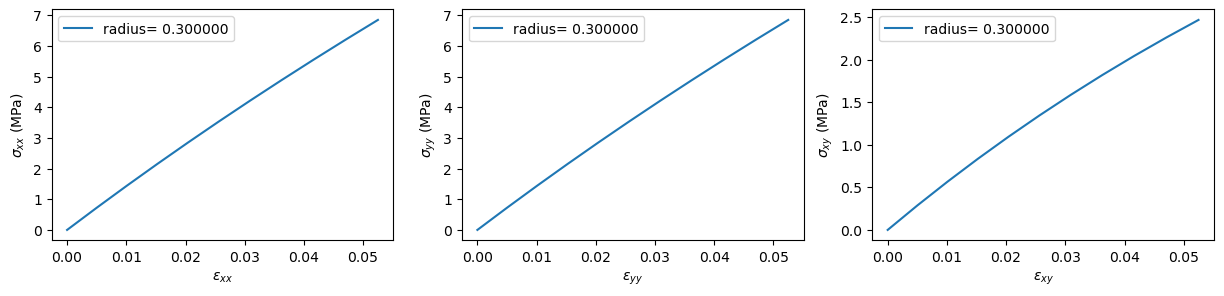

In [7]:
# plot the stress and strain results 
naive_plot(result) # ! note this function is not from the repo


**Run with a more structrual manner**
- what should we do if we have multiple simulations with different design variables ? 
- f3dasm! 

In [9]:
# create the doe
num_samples  = 2  # number of samples
# define the doe
radius = f3dasm.ContinuousParameter(name="radius", lower_bound=0.1, upper_bound=0.4)
size = f3dasm.ContinuousParameter(name="size", lower_bound=1.0, upper_bound=1.5)
# define the output
stress = f3dasm.ContinuousParameter(name="stress")
strain = f3dasm.ContinuousParameter(name="strain")
# create design object
design = f3dasm.DesignSpace(
    input_space=[radius, size], output_space=[stress, strain]
)
# sampling 
sampler = f3dasm.sampling.LatinHypercube(design=design, seed=1)
data = sampler.get_samples(numsamples=num_samples) 
# print sampling information 
print(data.data)

      input           output       
     radius      size stress strain
0  0.162553  1.325583    NaN    NaN
1  0.250017  1.180081    NaN    NaN


In [10]:
# run simulation via f3dasm manner 
results = naive_hollow_plate.run_f3dasm(data=data) 

/home/jiaxiangyi/Documents/rvesimulator/toturials/Data/case_0
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<18 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :25.005112 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<18 out of 30 licenses remain available>.


/home/jiaxiangyi/Documents/rvesimulator/toturials/Data/case_1
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<18 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :25.004468 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<18 out of 30 licenses remain available>.


In [11]:
# print the updated `data` class 
print(results.data)

      input                                                       output  \
     radius      size                                             stress   
0  0.162553  1.325583  [[[0.0, 0.0], [0.0, 0.0]], [[0.853524012391832...   
1  0.250017  1.180081  [[[0.0, 0.0], [0.0, 0.0]], [[0.705560575998447...   

                                                      
                                              strain  
0  [[[0.0, 0.0], [0.0, 0.0]], [[0.005024999887123...  
1  [[[0.0, 0.0], [0.0, 0.0]], [[0.005024999887123...  


In [12]:
def plot_results(data) :
    responses = results.data['output']
    fig, ax = plt.subplots(1, 3, figsize=(15, 3))
    pparam = dict(xlabel="$\epsilon_{xx}$", ylabel="$\sigma_{xx}$ (MPa)")
    ax[0].plot(
        responses["strain"][0][:, 0, 0],
        responses["stress"][0][:, 0, 0],
        label=f'radius= {results.data["input"]["radius"][0]:3f}',
    )
    ax[0].plot(
        responses["strain"][1][:, 0, 0],
        responses["stress"][1][:, 0, 0],
        label=f'radius= {results.data["input"]["radius"][1]:3f}',
    )
    ax[0].legend()
    ax[0].set(**pparam)

    pparam = dict(xlabel="$\epsilon_{yy}$", ylabel="$\sigma_{yy}$ (MPa)")
    ax[1].plot(
        responses["strain"][0][:, 1, 1],
        responses["stress"][0][:, 1, 1],
        label=f'radius= {results.data["input"]["radius"][0]:3f}',
    )
    ax[1].plot(
        responses["strain"][1][:, 1, 1],
        responses["stress"][1][:, 1, 1],
        label=f'radius= {results.data["input"]["radius"][1]:3f}',
    )

    ax[1].legend()
    ax[1].set(**pparam)

    pparam = dict(xlabel="$\epsilon_{xy}$", ylabel="$\sigma_{xy}$ (MPa)")
    ax[2].plot(
        responses["strain"][0][:, 1, 0],
        responses["stress"][0][:, 1, 0],
        label=f'radius= {results.data["input"]["radius"][0]:2f}',
    )
    ax[2].plot(
        responses["strain"][1][:, 1, 0],
        responses["stress"][1][:, 1, 0],
        label=f'radius= {results.data["input"]["radius"][1]:2f}',
    )
    ax[2].legend()
    ax[2].set(**pparam)

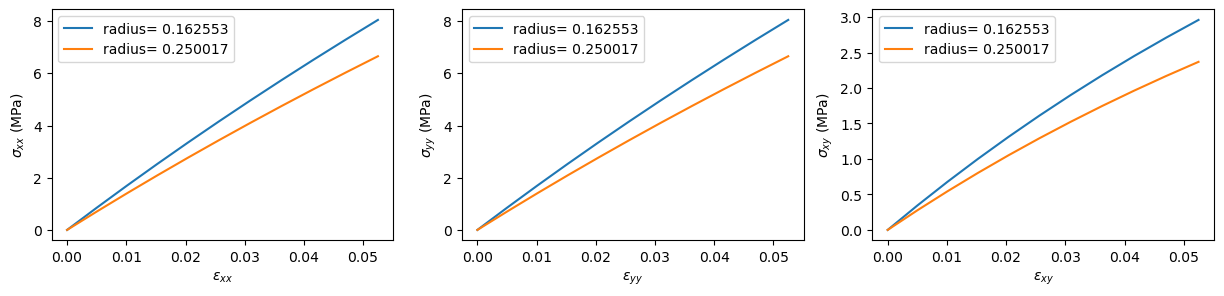

In [13]:
# plot the results 
plot_results(data)  # this function is not a function from the repo

### RVE with complex microstructure and plasticity
- **Well, I know you want more**
- **Let's continue** 

1. Components of RVE
    - Fiber material
    - Matrix material 
2. Schematic of RVE 


<center><img src="figures/RVE.png" width="300"></center>



#### Microstructure generation


In [14]:
# import corresponding modulus 
from rvesimulator.microstructure.circle_particles import CircleParticles

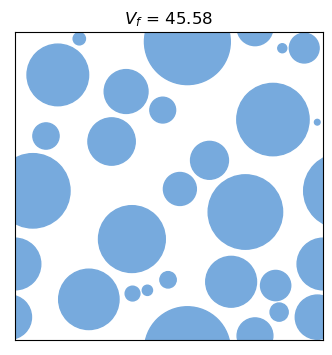

In [15]:
# initialize the microstructure generator 
microstructure_generator = CircleParticles(
    length=1.0,
    width=1.0,
    radius_mu=0.1,
    radius_std=0.03,
    vol_req=0.45,
)
microstructure_generator.generate_microstructure()
microstructure_generator.plot_microstructure(figsize=(4, 4))

#### to ABAQUS format

In [16]:
# save the microstrcuture by the abaqus format 
microstructure_info = microstructure_generator.to_abaqus_format(file_name="micro_structure.json") 

#### to CRATE format

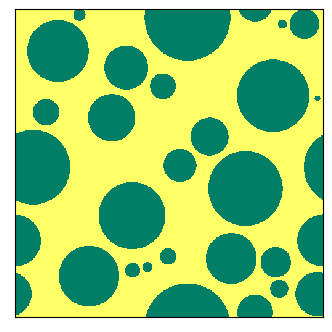

In [17]:
# show it by the crate format 
microstructure_generator.crate_rgmsh(num_discrete=500)
# plot 
microstructure_generator.rgmsh_plot(figsize=(4,4))
# save 
microstructure_generator.to_crate_format(file_name='microstucture.rgmsh')

#### Hardening law (I use von-mises plasticity law)
1. **linear hardening**  
$$ \sigma_{y}(\bar\varepsilon^{p}) = \sigma_{y,0} + a\bar\varepsilon^{p}$$
    - parameters: $\sigma_{y,0}$, $a$
    
2. **swift hardening**
$$ \sigma_{y}(\bar\varepsilon^{p}) = \sigma_{y,0} + a(\bar\varepsilon^{p})^{b}$$
    - parameters: $\sigma_{y,0}$, $a$, $b$
    
3. **ramberg hardening**
$$ \sigma_{y}(\bar\varepsilon^{p}) = \sigma_{y,0}(1 + a\bar\varepsilon^{p})^{\frac{1}{b}}$$
    - parameters: $\sigma_{y,0}$, $a$, $b$

##### implementation of hardening laws 

In [18]:
# import corresponding functions 
from rvesimulator.additionals.hardening_law import HardeningLaw 

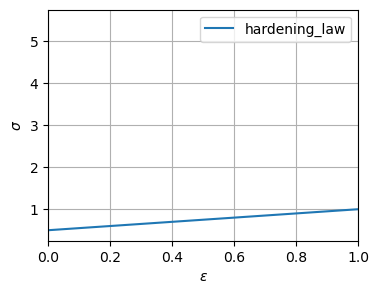

In [19]:
# initialize the hardening law 
hardening_law = HardeningLaw() 
hardening_law.linear(yield_stress= 0.5, a=0.5)
hardening_law.hardening_law_plot(figsize=(4,3)) 


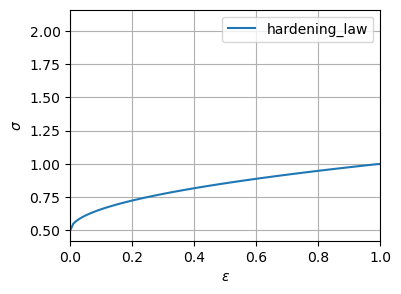

In [20]:
# get the swift law 
hardening_law.swift(yield_stress= 0.5, a=0.5, b=0.5)
hardening_law.hardening_law_plot(figsize=(4,3)) 

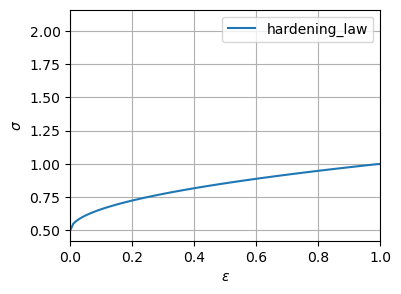

In [21]:
# get the ramberg law 
hardening_law.swift(yield_stress= 0.5, a=0.5, b=0.5)
hardening_law.hardening_law_plot(figsize=(4,3)) 

#### Assmble complex microstructure and plasticity law together (ASCARVE)

1. **microstructure**
<center><img src="figures/RVE.png" width="200"></center>

2. **material properties for matrix and fiber**
    - matrix 
        - $E_{matrix}=100 MPa$
        - $\nu_{matrix} = 0.3$
        - hardning law: swift, parameters: $\sigma_{y,0}= 0.5$, $a=0.2$, $b=0.4$
    - fiber 
        - $E_{fiber}=1 MPa$
        - $\nu_{fiber} = 0.19$

In [22]:
# import the problem 
from rvesimulator.cases.asca_rve import ASCARVE 

In [23]:
# intialize the problem 
asca_problem = ASCARVE() 
# print the default parameter information 
asca_problem.update_sim_info(yield_stress=0.5, a=0.2, b=0.4, print_info=True)

Simulation information: 

{
    "length": 0.048,
    "width": 0.048,
    "radius_mu": 0.003,
    "radius_std": 0.0,
    "vol_req": 0.3,
    "vol_frac": 0.3067961575771284,
    "mesh_partition": 100,
    "strain": [
        0.05,
        0.0,
        0.0
    ],
    "simulation_time": 1.0,
    "num_steps": 100,
    "num_cpu": 1,
    "platform": "ubuntu",
    "hardening_law": "swift",
    "hardening paras": {
        "yield_stress": 0.5,
        "a": 0.2,
        "b": 0.4
    },
    "E_matrix": 100.0,
    "Pr_matrix": 0.3,
    "E_fiber": 1.0,
    "Pr_fiber": 0.19
}


**Run a naive simulation**
 

In [24]:
samples = {'E_matrix': 100}  
result = asca_problem.run_simulation(sample=samples, third_folder_index=0)

/home/jiaxiangyi/Documents/rvesimulator/toturials/Data/Data/case_0
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<18 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :210.004417 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<17 out of 30 licenses remain available>.


In [25]:
def naive_plot_asca(result): 
    fig, ax = plt.subplots(1, 3, figsize=(16, 3))
    pparam = dict(xlabel="$\epsilon_{xx}$", ylabel="$\sigma_{xx}$ (MPa)")
    ax[0].plot(
        result["strain"][:, 0, 0],
        result["stress"][:, 0, 0],
        label=f'E_matrix= {samples["E_matrix"]}',
    )

    ax[0].legend()
    ax[0].set(**pparam)
    ax[0].grid('--')
    pparam = dict(xlabel="$\epsilon_{yy}$", ylabel="$\sigma_{yy}$ (MPa)")
    ax[1].plot(
        result["strain"][:, 1, 1],
        result["stress"][:, 1, 1],
        label=f'E_matrix= {samples["E_matrix"]}',
    )
    ax[1].legend()
    ax[1].set(**pparam)
    ax[1].grid('--')
    pparam = dict(xlabel="$\epsilon_{xy}$", ylabel="$\sigma_{xy}$ (MPa)")
    ax[2].plot(
        result["strain"][:, 1, 0],
        result["stress"][:, 1, 0],
        label=f'E_matrix= {samples["E_matrix"]}',
    )
    ax[2].legend()
    ax[2].set(**pparam)
    ax[2].grid('--')
    plt.show()

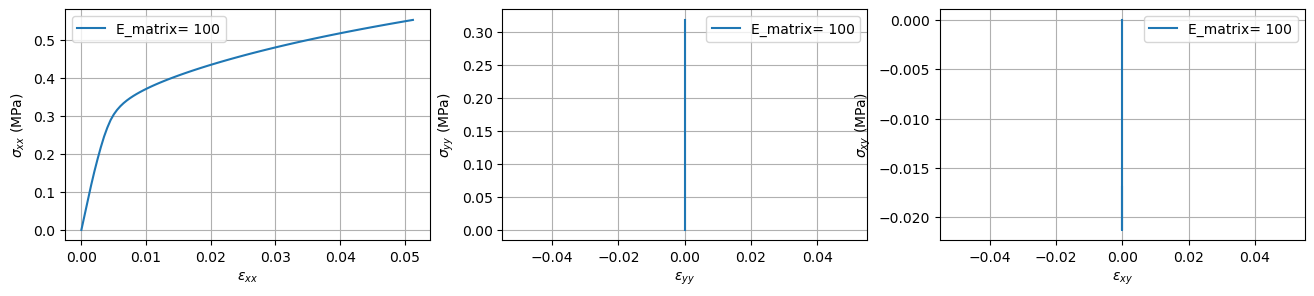

In [26]:
# plot the stress and strain results 
naive_plot_asca(result) # this function is not from the repo 

**Run with a more structrual manner**


In [27]:
# create the doe
num_samples  = num_samples  # number of samples
# define the doe
radius = f3dasm.ContinuousParameter(name="E_matrix", lower_bound=100.0, upper_bound=200.0)
size = f3dasm.ContinuousParameter(name="E_fiber", lower_bound=1.0, upper_bound=3.0)
# define the output
stress = f3dasm.ContinuousParameter(name="stress")
strain = f3dasm.ContinuousParameter(name="strain")
# create design object
design = f3dasm.DesignSpace(
    input_space=[radius, size], output_space=[stress, strain]
)
# sampling 
sampler = f3dasm.sampling.LatinHypercube(design=design, seed=1)
data = sampler.get_samples(numsamples=num_samples) 
# print sampling information 
print(data.data)

        input           output       
     E_matrix   E_fiber stress strain
0  120.851100  2.302333    NaN    NaN
1  150.005719  1.720324    NaN    NaN


In [28]:
# update some simulation information
asca_problem.update_sim_info(strain=[0.02,0.02,0.02], yield_stress=0.5, a=0.2, b=0.4, num_cpu=6, print_info=True) 

Simulation information: 

{
    "length": 0.048,
    "width": 0.048,
    "radius_mu": 0.003,
    "radius_std": 0.0,
    "vol_req": 0.3,
    "vol_frac": 0.3067961575771284,
    "mesh_partition": 100,
    "strain": [
        0.02,
        0.02,
        0.02
    ],
    "simulation_time": 1.0,
    "num_steps": 100,
    "num_cpu": 6,
    "platform": "ubuntu",
    "hardening_law": "swift",
    "hardening paras": {
        "yield_stress": 0.5,
        "a": 0.2,
        "b": 0.4
    },
    "E_matrix": 100.0,
    "Pr_matrix": 0.3,
    "E_fiber": 1.0,
    "Pr_fiber": 0.19
}


In [29]:
# run simulation via f3dasm manner 
results = asca_problem.run_f3dasm(data=data) 

/home/jiaxiangyi/Documents/rvesimulator/toturials/Data/Data/case_0
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<17 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :115.005122 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<17 out of 30 licenses remain available>.


/home/jiaxiangyi/Documents/rvesimulator/toturials/Data/Data/case_1
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<17 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :115.005126 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<17 out of 30 licenses remain available>.


In [30]:
def plot_asca_results(data) :
    responses = results.data['output']
    fig, ax = plt.subplots(1, 3, figsize=(16, 4))
    pparam = dict(xlabel="$\epsilon_{xx}$", ylabel="$\sigma_{xx}$ (MPa)")
    ax[0].plot(
        responses["strain"][0][:, 0, 0],
        responses["stress"][0][:, 0, 0],
        label=f'E_matrix= {results.data["input"]["E_matrix"][0]:.2f}, E_fiber = {results.data["input"]["E_fiber"][0]:.2f}')
    ax[0].plot(
        responses["strain"][1][:, 0, 0],
        responses["stress"][1][:, 0, 0],
       label=f'E_matrix= {results.data["input"]["E_matrix"][1]:.2f}, E_fiber = {results.data["input"]["E_fiber"][1]:.2f}'
    )
    ax[0].legend()
    ax[0].set(**pparam)

    pparam = dict(xlabel="$\epsilon_{yy}$", ylabel="$\sigma_{yy}$ (MPa)")
    ax[1].plot(
        responses["strain"][0][:, 1, 1],
        responses["stress"][0][:, 1, 1],
        label=f'E_matrix= {results.data["input"]["E_matrix"][0]:.2f}, E_fiber = {results.data["input"]["E_fiber"][0]:.2f}')
    ax[1].plot(
        responses["strain"][1][:, 1, 1],
        responses["stress"][1][:, 1, 1],
        label=f'E_matrix= {results.data["input"]["E_matrix"][1]:.2f}, E_fiber = {results.data["input"]["E_fiber"][1]:.2f}')

    ax[1].legend()
    ax[1].set(**pparam)

    pparam = dict(xlabel="$\epsilon_{xy}$", ylabel="$\sigma_{xy}$ (MPa)")
    ax[2].plot(
        responses["strain"][0][:, 1, 0],
        responses["stress"][0][:, 1, 0],
        label=f'E_matrix= {results.data["input"]["E_matrix"][0]:.2f}, E_fiber = {results.data["input"]["E_fiber"][0]:.2f}')
    ax[2].plot(
        responses["strain"][1][:, 1, 0],
        responses["stress"][1][:, 1, 0],
        label=f'E_matrix= {results.data["input"]["E_matrix"][1]:.2f}, E_fiber = {results.data["input"]["E_fiber"][1]:.2f}')
    ax[2].legend()
    ax[2].set(**pparam)

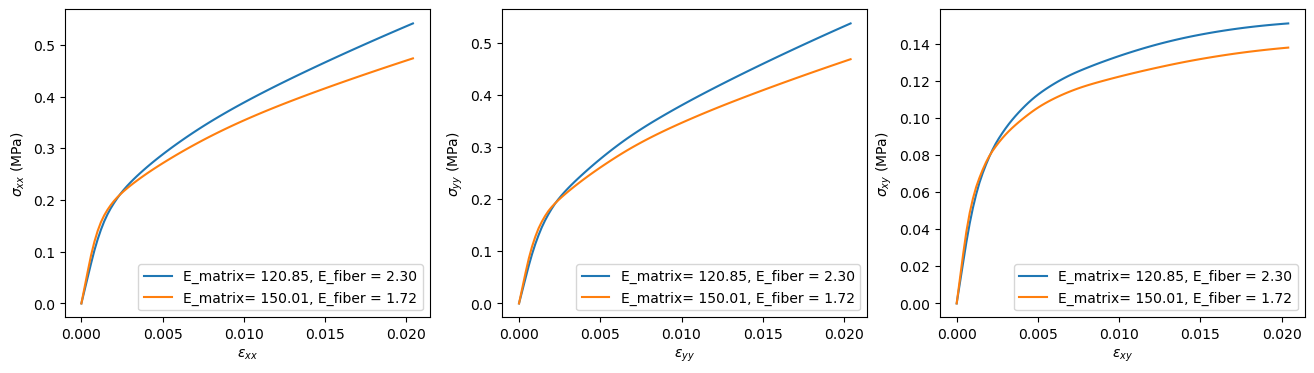

In [31]:
# plot the results 
plot_asca_results(data) # note this function is not from the repo

### CDDM RVE
- **Actually, we still can have more** 
- **what if we want to have more complex loading?** 



- #### **history dependent strain loadings[1]**


<center><img src="figures/pnas.jpg" width="800"></center>

<font size="2"> [1] Mozaffar, M., Bostanabad, R., Chen, W., Ehmann, K., Cao, J., & Bessa, M. A. (2019). Deep learning predicts path-dependent plasticity. Proceedings of the National Academy of Sciences, 116(52), 26414-26420.</font> 

- **Amplitude sample** 
    - this functionality is used to generate the amplitude curves, it then can be used to shape different loading (such as strain, temperature, displacement and so on) following an expected way. 
    - Note, the amplitude generator will generate curve whose value is between -1 and 1, and by multiplying a scaling number it can be set properly range as the user defined. 

In [34]:
# import the correpsonding part 
from rvesimulator.additionals.ampitudesampler import AmplitudeGenerator  
#  import the class 
amplitude_sampler = AmplitudeGenerator(num_dim=3) 
#  initialize the class
amplitudes = amplitude_sampler.get_amplitude(
    num_amplitude=2,
    num_control=8,
    num_steps=100,
    arg_name="strain_amplitude",
    seed=1,
)

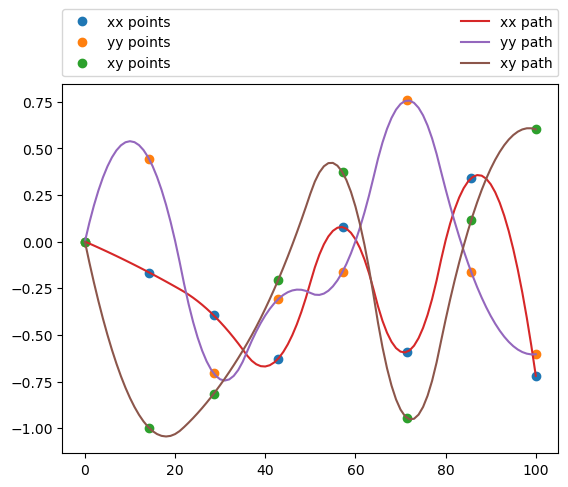

In [35]:
# plot the amplitudes
amplitude_sampler.plot_amplitude(iteration=0 ,internal=True)

- **CDDMRVE**
1. **microstructure**
<center><img src="figures/RVE.png" width="200"></center>

2. **material properties for matrix and fiber**
    - matrix 
        - $E_{matrix}=100 MPa$
        - $\nu_{matrix} = 0.3$
        - hardning law: swift, parameters: $\sigma_{y,0}= 0.5$, $a=0.2$, $b=0.4$
    - fiber 
        - $E_{fiber}=1 MPa$
        - $\nu_{fiber} = 0.19$
3. **loadings** 
    - history dependent strain loadings


- **CDDMRVE implementation**

In [36]:
# import the function 
from rvesimulator.cases.cddm_rve import CDDMRVE 
# initialization 
cddm_problem = CDDMRVE() 

In [37]:
# see the default simulation information 
cddm_problem.update_sim_info(
    hardening_law="swift",
    yield_stress=0.5,
    a=0.2,
    b=0.4,
    print_info=True
)

Simulation information: 

{
    "length": 0.048,
    "width": 0.048,
    "radius_mu": 0.003,
    "radius_std": 0.0,
    "vol_req": 0.3,
    "vol_frac": 0.3067961575771284,
    "mesh_partition": 100,
    "strain": [
        0.05,
        0.0,
        0.0
    ],
    "strain_amplitude": null,
    "simulation_time": 1.0,
    "num_steps": 100,
    "num_cpu": 1,
    "platform": "ubuntu",
    "hardening_law": "swift",
    "hardening paras": {
        "yield_stress": 0.5,
        "a": 0.2,
        "b": 0.4
    },
    "E_matrix": 100.0,
    "Pr_matrix": 0.3,
    "E_fiber": 1.0,
    "Pr_fiber": 0.19
}


In [38]:
#  uodate some information
cddm_problem.update_sim_info(
    hardening_law="swift",
    yield_stress=0.5,
    a=0.2,
    b=0.4,
    strain=[0.02, 0.02, 0.02],
    num_cpu=6,
    print_info=True
)

Simulation information: 

{
    "length": 0.048,
    "width": 0.048,
    "radius_mu": 0.003,
    "radius_std": 0.0,
    "vol_req": 0.3,
    "vol_frac": 0.3067961575771284,
    "mesh_partition": 100,
    "strain": [
        0.02,
        0.02,
        0.02
    ],
    "strain_amplitude": null,
    "simulation_time": 1.0,
    "num_steps": 100,
    "num_cpu": 6,
    "platform": "ubuntu",
    "hardening_law": "swift",
    "hardening paras": {
        "yield_stress": 0.5,
        "a": 0.2,
        "b": 0.4
    },
    "E_matrix": 100.0,
    "Pr_matrix": 0.3,
    "E_fiber": 1.0,
    "Pr_fiber": 0.19
}


In [39]:
# get the samples 
samples_dict = amplitudes.to_dict("record") 

# run the simulation and get the results 
results = {}
for ii in range(len(samples_dict)):
    results[ii] = cddm_problem.run_simulation(
        sample=samples_dict[ii], third_folder_index=ii
    )

/home/jiaxiangyi/Documents/rvesimulator/toturials/Data/Data/Data/case_0
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<16 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :425.002208 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<15 out of 30 licenses remain available>.


/home/jiaxiangyi/Documents/rvesimulator/toturials/Data/Data/Data/case_1
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<15 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :370.005117 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<16 out of 30 licenses remain available>.


In [41]:
def cddm_plot(results, index):
    fig, ax = plt.subplots(2,3, figsize =(16, 8))
    pparam = dict(xlabel="time step", ylabel=r"$\varepsilon_{xx}$ (MPa)")
    ax[0,0].plot(
        results[index]["strain"][:, 0, 0],
    )
    ax[0,0].set(**pparam)
    pparam = dict(xlabel="time step", ylabel=r"$\varepsilon_{xy}$ (MPa)")
    ax[0,1].plot(
        results[index]["strain"][:, 0, 1],
    )
    ax[0,1].set(**pparam)
    pparam = dict(xlabel="time step", ylabel=r"$\varepsilon_{yy}$ (MPa)")
    ax[0,2].plot(
        results[index]["strain"][:, 1, 1],
    )
    ax[0,2].set(**pparam)

    pparam = dict(xlabel="time step", ylabel=r"$\sigma_{xx}$ (MPa)")
    ax[1,0].plot(
        results[index]["stress"][:, 0, 0],
    )
    ax[1,0].set(**pparam)
    pparam = dict(xlabel="time step", ylabel=r"$\sigma_{xy}$ (MPa)")
    ax[1,1].plot(
        results[index]["stress"][:, 0, 1],
    )
    ax[1,1].set(**pparam)
    pparam = dict(xlabel="time step", ylabel=r"$\sigma_{yy}$ (MPa)")
    ax[1,2].plot(
        results[index]["stress"][:, 1, 1],

    )
    plt.show()

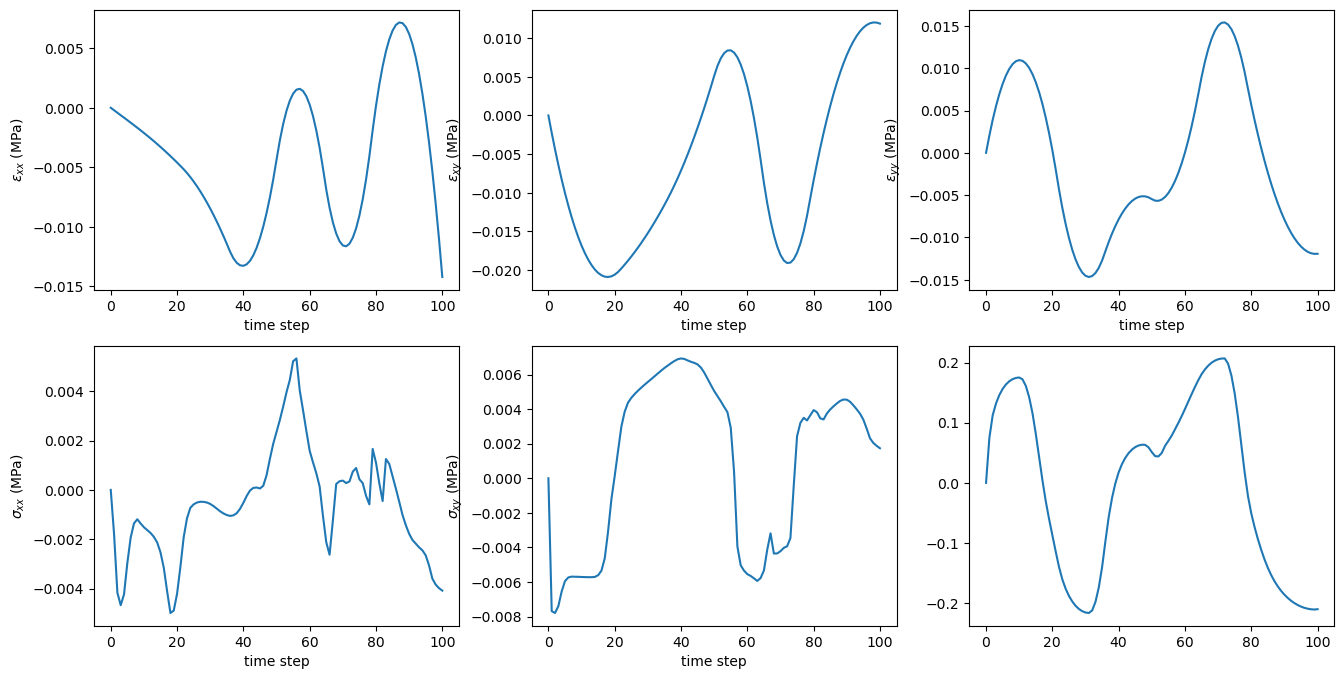

In [42]:
# plot the results 
cddm_plot(results, index=0)

# Thanks for your attention